In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error,f1_score,precision_score,recall_score,roc_auc_score

In [2]:
data = pd.read_csv("statlog.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    float64
 1   sex       270 non-null    float64
 2   cp        270 non-null    float64
 3   trestbps  270 non-null    float64
 4   chol      270 non-null    float64
 5   fbs       270 non-null    float64
 6   restecg   270 non-null    float64
 7   thalach   270 non-null    float64
 8   exang     270 non-null    float64
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    float64
 11  ca        270 non-null    float64
 12  thal      270 non-null    float64
 13  presence  270 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 29.7 KB


# Check for missing values

<AxesSubplot:>

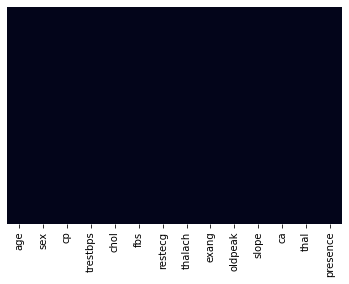

In [5]:
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)

# Check for impossible values(a value that should not be zero, example is blood pressure)

<AxesSubplot:>

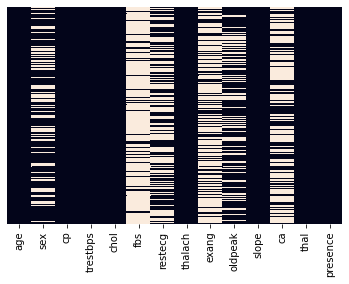

In [6]:
sns.heatmap(data==0,cbar=False,yticklabels=False)

In [7]:
data_numerical = data[["age","trestbps","chol","thalach","oldpeak","presence"]]
data_numerical

,age,trestbps,chol,thalach,oldpeak,presence
0,70.0,130.0,322.0,109.0,2.4,2
1,67.0,115.0,564.0,160.0,1.6,1
2,57.0,124.0,261.0,141.0,0.3,2
3,64.0,128.0,263.0,105.0,0.2,1
4,74.0,120.0,269.0,121.0,0.2,1
...,...,...,...,...,...,...
265,52.0,172.0,199.0,162.0,0.5,1
266,44.0,120.0,263.0,173.0,0.0,1
267,56.0,140.0,294.0,153.0,1.3,1
268,57.0,140.0,192.0,148.0,0.4,1


In [8]:
data_nominal = data.drop(data_numerical,axis=1)
data_nominal['presence'] = data['presence']
data_nominal

,sex,cp,fbs,restecg,exang,slope,ca,thal,presence
0,1.0,4.0,0.0,2.0,0.0,2.0,3.0,3.0,2
1,0.0,3.0,0.0,2.0,0.0,2.0,0.0,7.0,1
2,1.0,2.0,0.0,0.0,0.0,1.0,0.0,7.0,2
3,1.0,4.0,0.0,0.0,1.0,2.0,1.0,7.0,1
4,0.0,2.0,0.0,2.0,1.0,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...
265,1.0,3.0,1.0,0.0,0.0,1.0,0.0,7.0,1
266,1.0,2.0,0.0,0.0,0.0,1.0,0.0,7.0,1
267,0.0,2.0,0.0,2.0,0.0,2.0,0.0,3.0,1
268,1.0,4.0,0.0,0.0,0.0,2.0,0.0,6.0,1


# Visualizing numerical features

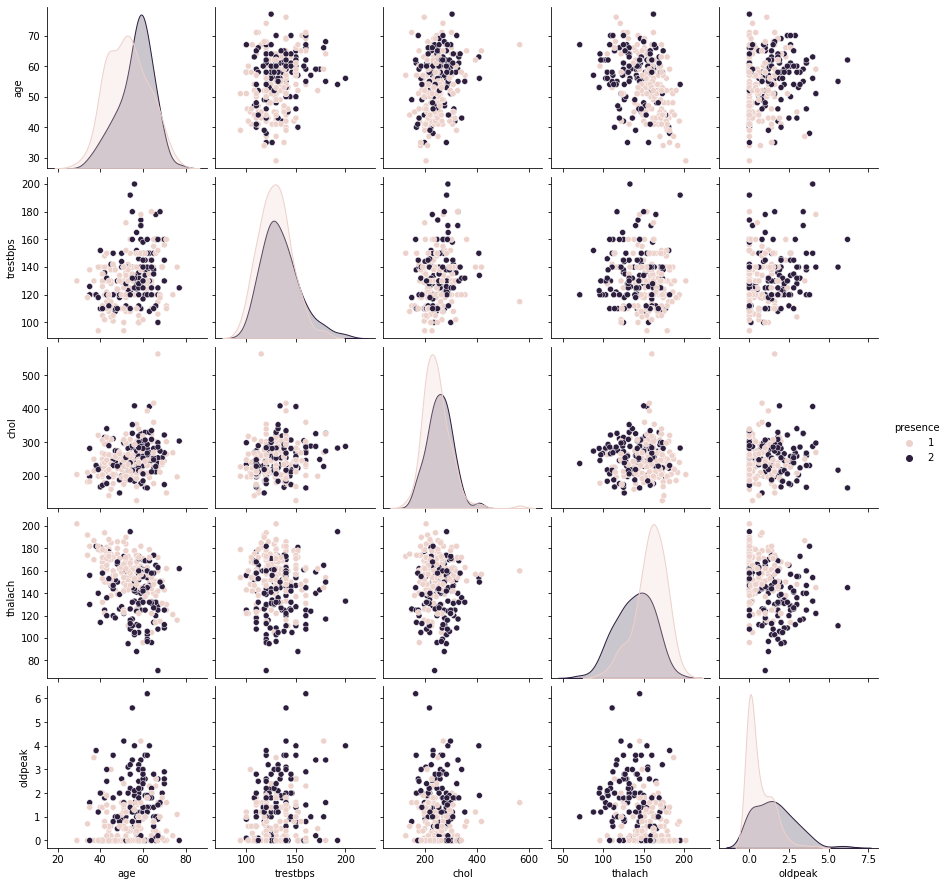

In [9]:
sns.pairplot(data_numerical,hue='presence')

# Visualizing nominal features

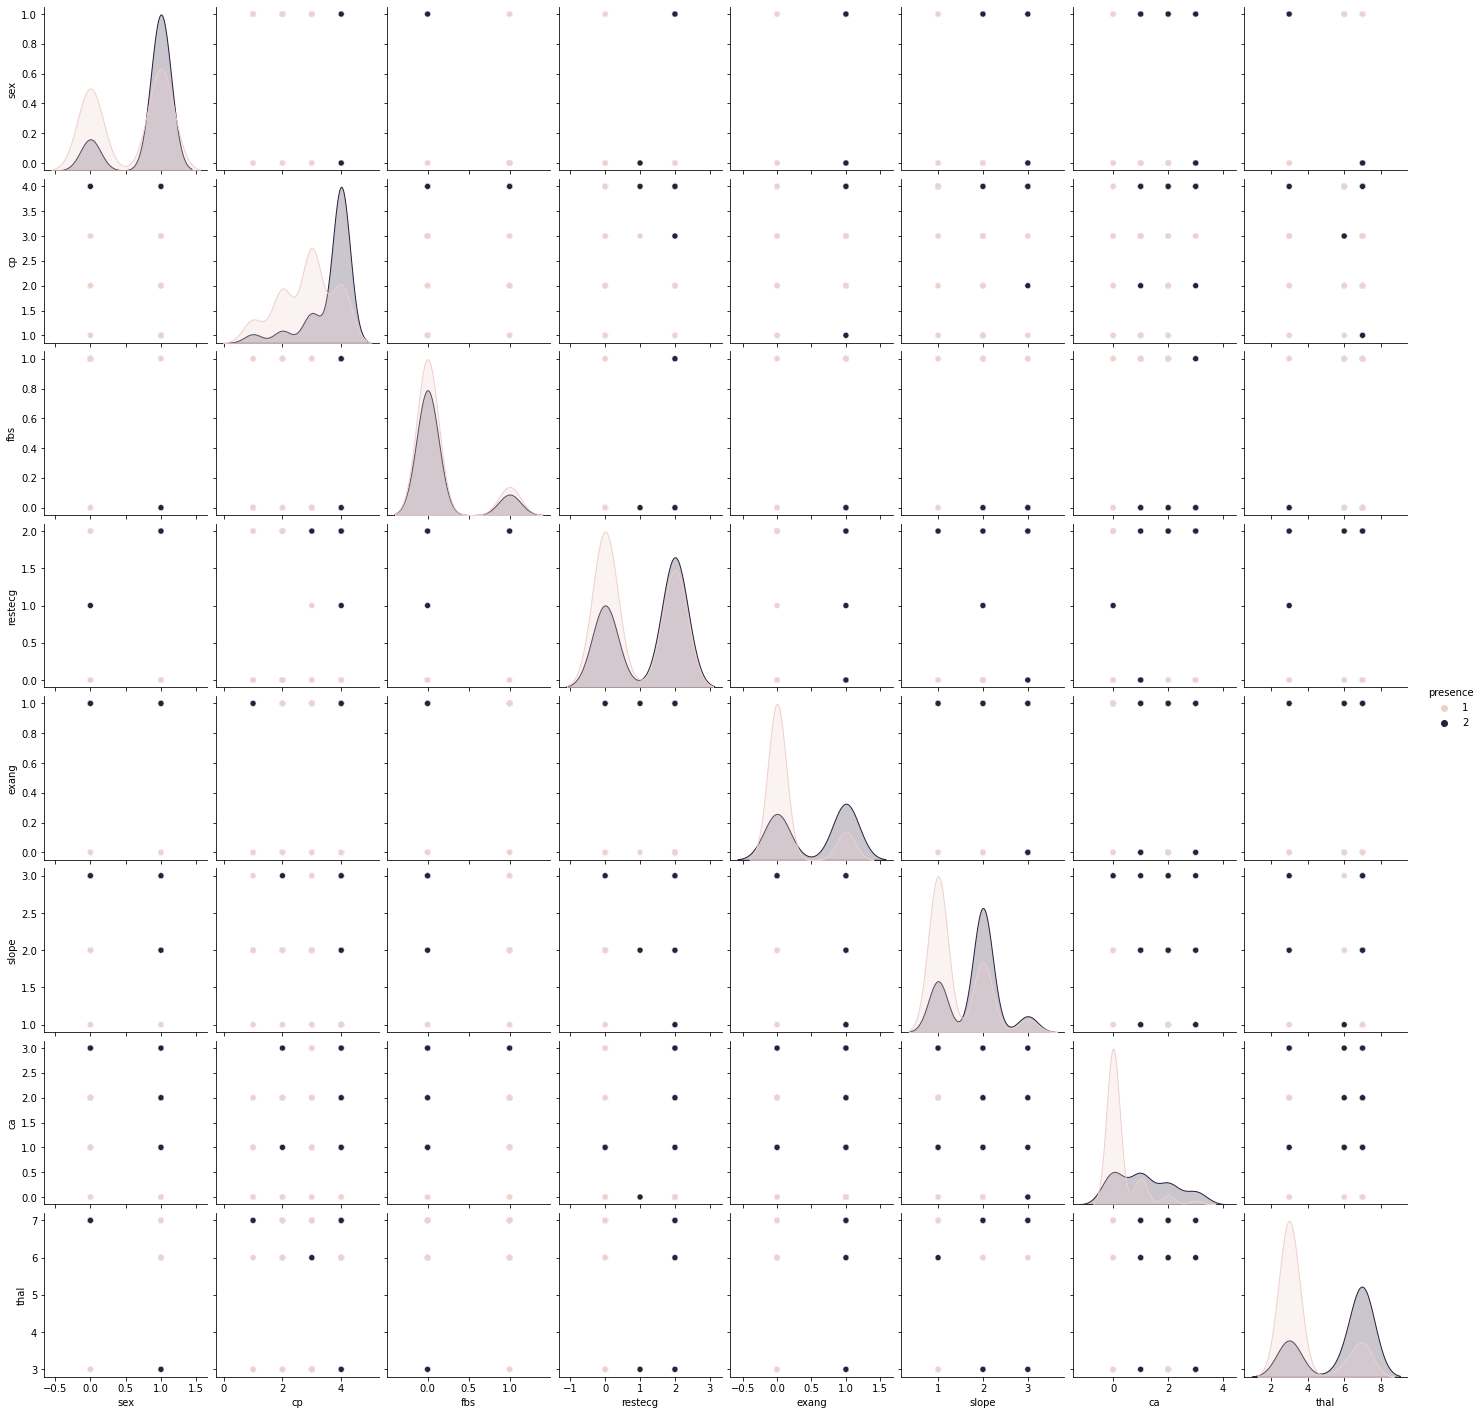

In [10]:
sns.pairplot(data_nominal,hue='presence')

In [11]:
data_numerical

,age,trestbps,chol,thalach,oldpeak,presence
0,70.0,130.0,322.0,109.0,2.4,2
1,67.0,115.0,564.0,160.0,1.6,1
2,57.0,124.0,261.0,141.0,0.3,2
3,64.0,128.0,263.0,105.0,0.2,1
4,74.0,120.0,269.0,121.0,0.2,1
...,...,...,...,...,...,...
265,52.0,172.0,199.0,162.0,0.5,1
266,44.0,120.0,263.0,173.0,0.0,1
267,56.0,140.0,294.0,153.0,1.3,1
268,57.0,140.0,192.0,148.0,0.4,1


# Data Distribution for Numerical Features

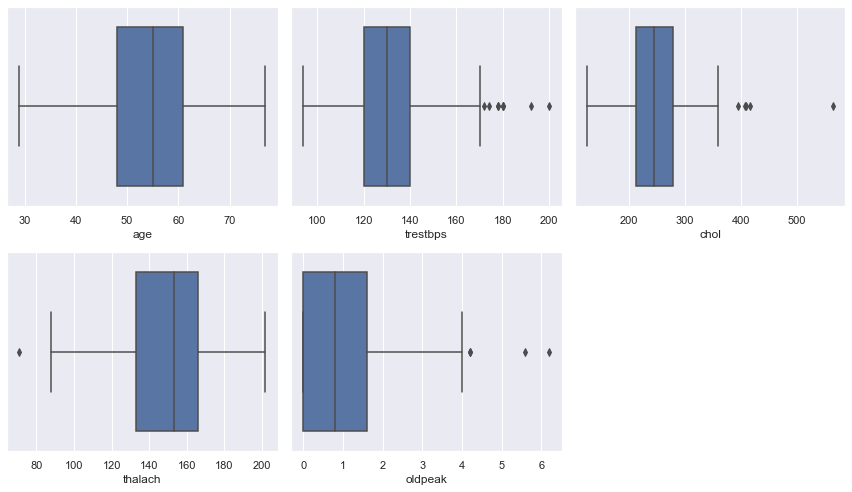

In [12]:
sns.set(rc={"figure.figsize":(12, 7)})
sns.set_style('darkgrid')
plt.subplot(2,3,1)
sns.boxplot(data=data_numerical,x='age')
plt.subplot(2,3,2)
sns.boxplot(data=data_numerical,x='trestbps')
plt.subplot(2,3,3)
sns.boxplot(data=data_numerical,x='chol')
plt.subplot(2,3,4)
sns.boxplot(data=data_numerical,x='thalach')
plt.subplot(2,3,5)
sns.boxplot(data=data_numerical,x='oldpeak')
plt.tight_layout()

In [13]:
data_nominal

,sex,cp,fbs,restecg,exang,slope,ca,thal,presence
0,1.0,4.0,0.0,2.0,0.0,2.0,3.0,3.0,2
1,0.0,3.0,0.0,2.0,0.0,2.0,0.0,7.0,1
2,1.0,2.0,0.0,0.0,0.0,1.0,0.0,7.0,2
3,1.0,4.0,0.0,0.0,1.0,2.0,1.0,7.0,1
4,0.0,2.0,0.0,2.0,1.0,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...
265,1.0,3.0,1.0,0.0,0.0,1.0,0.0,7.0,1
266,1.0,2.0,0.0,0.0,0.0,1.0,0.0,7.0,1
267,0.0,2.0,0.0,2.0,0.0,2.0,0.0,3.0,1
268,1.0,4.0,0.0,0.0,0.0,2.0,0.0,6.0,1


# Count of unique values for nomianl features interms of Presence

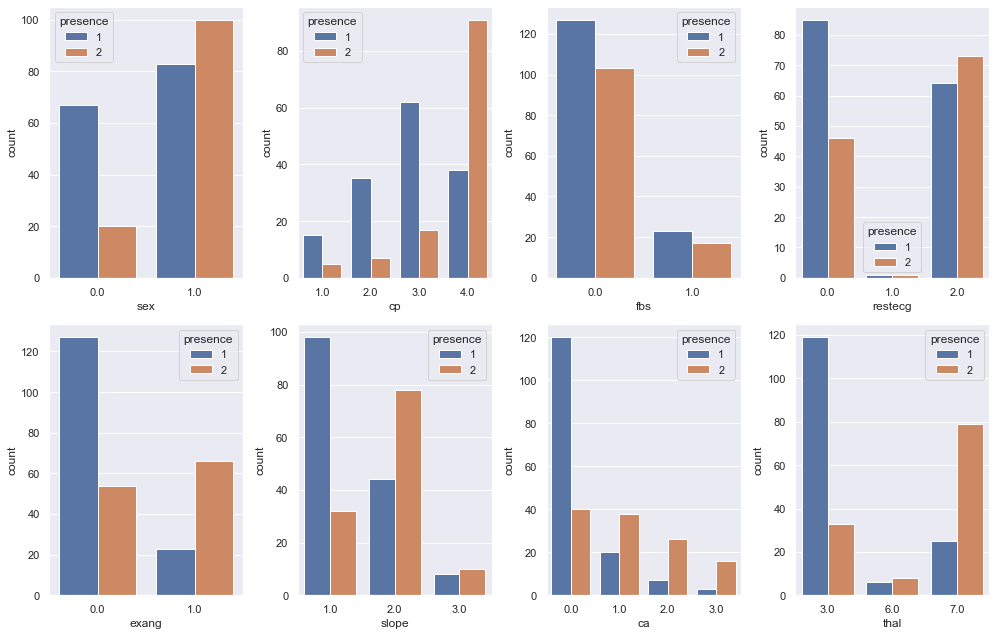

In [14]:
sns.set(rc={"figure.figsize":(14, 9)})
plt.subplot(2,4,1)
sns.countplot(data=data_nominal,x='sex',hue='presence')
plt.subplot(2,4,2)
sns.countplot(data=data_nominal,x='cp',hue='presence')
plt.subplot(2,4,3)
sns.countplot(data=data_nominal,x='fbs',hue='presence')
plt.subplot(2,4,4)
sns.countplot(data=data_nominal,x='restecg',hue='presence')
plt.subplot(2,4,5)
sns.countplot(data=data_nominal,x='exang',hue='presence')
plt.subplot(2,4,6)
sns.countplot(data=data_nominal,x='slope',hue='presence')
plt.subplot(2,4,7)
sns.countplot(data=data_nominal,x='ca',hue='presence')
plt.subplot(2,4,8)
sns.countplot(data=data_nominal,x='thal',hue='presence')

plt.tight_layout()

# Count for unique values of presence features

1    150
2    120
Name: presence, dtype: int64

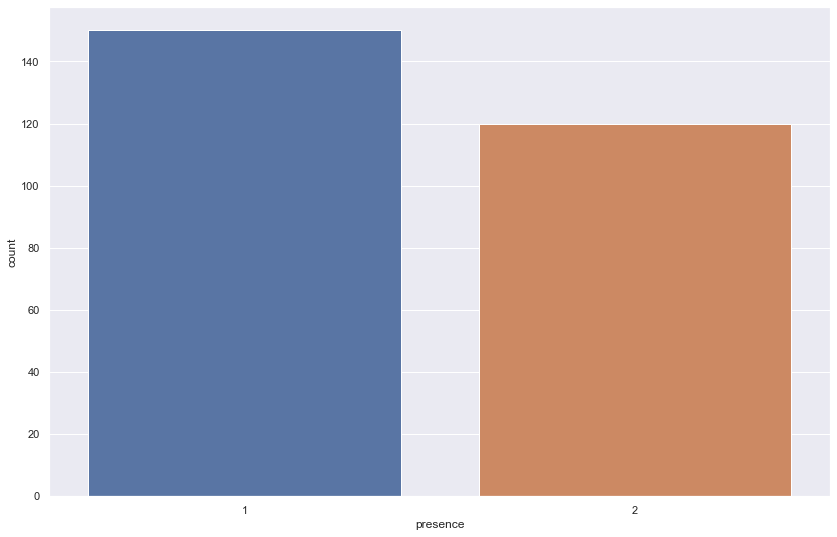

In [15]:
sns.countplot(data=data,x='presence')
data['presence'].value_counts()

## Observation: the presence feature is slightly unbalanced

In [16]:
X = data.drop('presence',axis=1) 
y = data['presence']

In [17]:
pipe_rf = Pipeline([("sc",StandardScaler()),
                   ("pca",PCA(n_components=0.95)),
                   ("forest",RandomForestClassifier(criterion= 'entropy', max_features= 'sqrt', n_estimators= 100))])

pipe_svm = Pipeline([("sc",StandardScaler()),
                   ("pca",PCA(n_components=0.95)),
                   ("svm",SVC(C= 100, gamma= 1, kernel= 'rbf'))])

pipe_knn = Pipeline([("sc",StandardScaler()),
                   ("pca",PCA(n_components=0.95)),
                   ("knn",KNeighborsClassifier(algorithm = 'auto', n_neighbors = 3, weights = 'distance'))])

pipe_ada = Pipeline([("sc",StandardScaler()),
                   ("pca",PCA(n_components=0.95)),
                   ("ada",AdaBoostClassifier(algorithm = 'SAMME.R', learning_rate = 0.5, n_estimators = 1000))])

pipe_mlp = Pipeline([('scaler',StandardScaler()),
                   ('pca',PCA(n_components=0.95)),
                   ('mlp',MLPClassifier(hidden_layer_sizes=(128,64,32), max_iter=300,
                                        activation='relu',solver='adam', random_state=1))])

ensemble_model = [("forest",pipe_rf),("svm",pipe_svm),("knn",pipe_knn),("ada",pipe_ada),("mlp",pipe_mlp)]

pipe_stacking = Pipeline([("Stacking",StackingClassifier(estimators=ensemble_model, 
                                                         final_estimator=LogisticRegression(random_state=101)))])

final_models = [pipe_rf,pipe_svm,pipe_knn,pipe_ada,pipe_mlp,pipe_stacking]

In [18]:
skf = StratifiedKFold(n_splits=10)

In [19]:
test_score = []
train_score = []
for train_set,test_set in skf.split(X,y):
    X_train, X_test = X.iloc[train_set], X.iloc[test_set]
    y_train, y_test = y[train_set], y[test_set]
    
    #random forest
    final_models[0].fit(X_train,y_train)
    
    rf_pred_train = final_models[0].predict(X_train)
    rf_pred_test = final_models[0].predict(X_test)
    
    train_score.append(mean_absolute_error(y_train,rf_pred_train))
    test_score.append(mean_absolute_error(y_test,rf_pred_test))
    
    #svm
    final_models[1].fit(X_train,y_train)
    
    svm_pred_train = final_models[1].predict(X_train)
    svm_pred_test = final_models[1].predict(X_test)
    
    train_score.append(mean_absolute_error(y_train,svm_pred_train))
    test_score.append(mean_absolute_error(y_test,svm_pred_test))
    
    #knn
    final_models[2].fit(X_train,y_train)
    
    knn_pred_train = final_models[2].predict(X_train)
    knn_pred_test = final_models[2].predict(X_test)
    
    train_score.append(mean_absolute_error(y_train,knn_pred_train))
    test_score.append(mean_absolute_error(y_test,knn_pred_test))
    
    #ada
    final_models[3].fit(X_train,y_train)
    
    ada_pred_train = final_models[3].predict(X_train)
    ada_pred_test = final_models[3].predict(X_test)
    
    train_score.append(mean_absolute_error(y_train,ada_pred_train))
    test_score.append(mean_absolute_error(y_test,ada_pred_test))
    
    #mlp
    final_models[4].fit(X_train,y_train)
    
    mlp_pred_train = final_models[4].predict(X_train)
    mlp_pred_test = final_models[4].predict(X_test)
    
    train_score.append(mean_absolute_error(y_train,mlp_pred_train))
    test_score.append(mean_absolute_error(y_test,mlp_pred_test))
    
    #stakcing
    final_models[5].fit(X_train,y_train)
    
    stacking_pred_train = final_models[4].predict(X_train)
    stacking_pred_test = final_models[4].predict(X_test)
    
    train_score.append(mean_absolute_error(y_train,stacking_pred_train))
    test_score.append(mean_absolute_error(y_test,stacking_pred_test))


In [20]:
test_score_arr = np.array(test_score)
train_score_arr = np.array(train_score)

In [21]:
test_score_arr  = test_score_arr.reshape(6,10)
train_score_arr  = train_score_arr.reshape(6,10)

# Visuzaling if the data is overfit using different kind of models

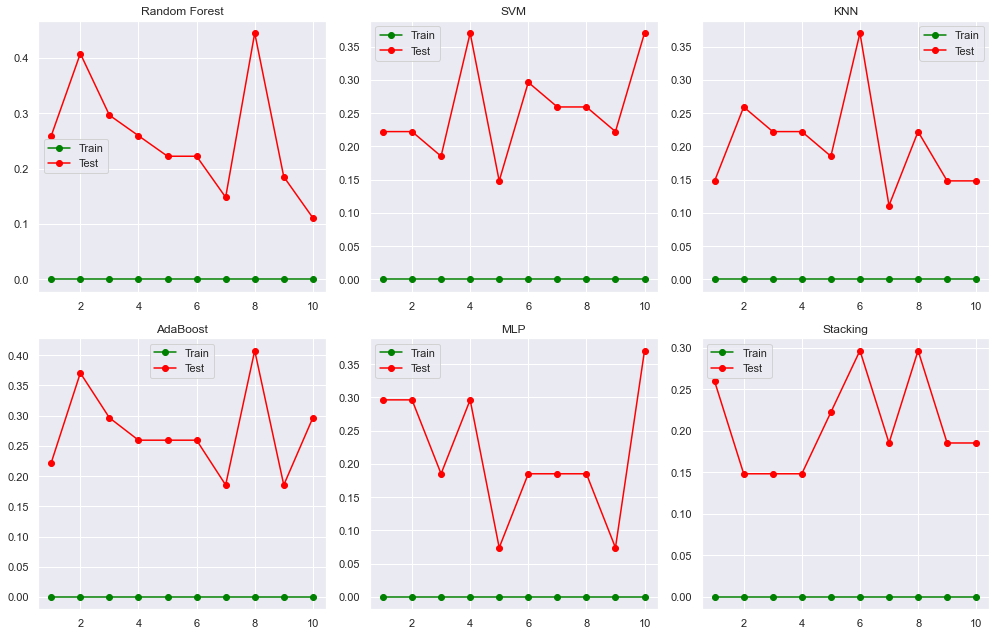

In [22]:
plt.subplot(2,3,1)
plt.plot(range(1,skf.get_n_splits()+1),train_score_arr[0],'o-',color='green',label='Train')
plt.plot(range(1,skf.get_n_splits()+1),test_score_arr[0],'o-',color='red',label='Test')
plt.title('Random Forest')
plt.legend()

plt.subplot(2,3,2)
plt.plot(range(1,skf.get_n_splits()+1),train_score_arr[1],'o-',color='green',label='Train')
plt.plot(range(1,skf.get_n_splits()+1),test_score_arr[1],'o-',color='red',label='Test')
plt.title('SVM')
plt.legend()

plt.subplot(2,3,3)
plt.plot(range(1,skf.get_n_splits()+1),train_score_arr[2],'o-',color='green',label='Train')
plt.plot(range(1,skf.get_n_splits()+1),test_score_arr[2],'o-',color='red',label='Test')
plt.title('KNN')
plt.legend()

plt.subplot(2,3,4)
plt.plot(range(1,skf.get_n_splits()+1),train_score_arr[3],'o-',color='green',label='Train')
plt.plot(range(1,skf.get_n_splits()+1),test_score_arr[3],'o-',color='red',label='Test')
plt.title('AdaBoost')
plt.legend()

plt.subplot(2,3,5)
plt.plot(range(1,skf.get_n_splits()+1),train_score_arr[4],'o-',color='green',label='Train')
plt.plot(range(1,skf.get_n_splits()+1),test_score_arr[4],'o-',color='red',label='Test')
plt.title('MLP')
plt.legend()

plt.subplot(2,3,6)
plt.plot(range(1,skf.get_n_splits()+1),train_score_arr[5],'o-',color='green',label='Train')
plt.plot(range(1,skf.get_n_splits()+1),test_score_arr[5],'o-',color='red',label='Test')
plt.title('Stacking')
plt.legend()


plt.tight_layout()

plt.show()

## Observation: all of the model is overfit since the range of train is 0 and the test is 0.1 - 0.4, We will use different techniques to reduced the overfitting of the models

In [23]:
sampler = RandomOverSampler()

X_sampler,y_sampler = sampler.fit_resample(X,y)

data_resample = pd.concat([X_sampler,y_sampler],axis=1)

1    150
2    150
Name: presence, dtype: int64

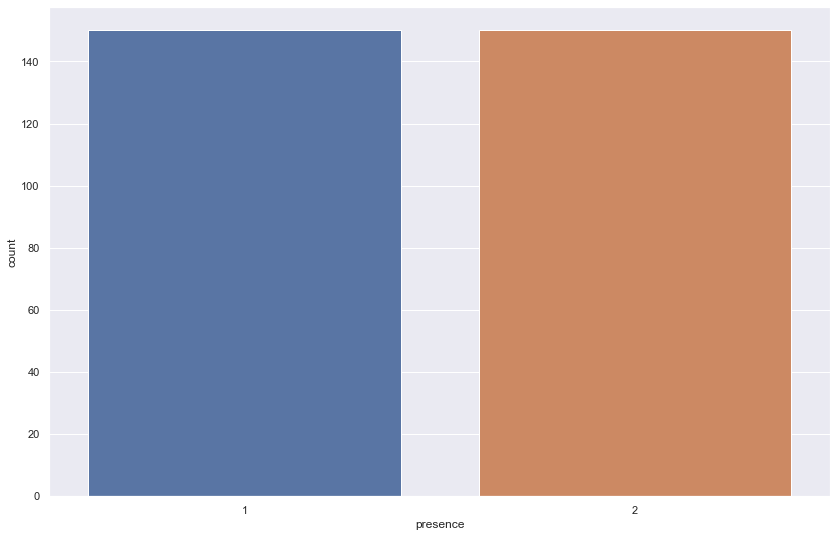

In [24]:
sns.countplot(data=data_resample,x='presence')
data_resample['presence'].value_counts()

In [25]:
X = data_resample.drop('presence',axis=1) 
y = data_resample['presence']

In [26]:
accuracy_scoring = []

In [27]:
model_names = {0:'Random Forest',1:'SVM',2:'KNN',3:'AdaBoost',4:'MLP',5:'Stacking'}

In [28]:
for i,models in enumerate(final_models):
    accuracy_scoring.append(cross_val_score(models,X,y,cv=skf,scoring='accuracy'))    

In [29]:
df_result = pd.DataFrame({'Random Forest':accuracy_scoring[0],'SVM':accuracy_scoring[1],
                          'KNN':accuracy_scoring[2],'AdaBoost':accuracy_scoring[3],
                          'MLP':accuracy_scoring[4],'Stacking':accuracy_scoring[5]})
df_result

,Random Forest,SVM,KNN,AdaBoost,MLP,Stacking
0,0.833333,0.700000,0.733333,0.833333,0.833333,0.900000
1,0.800000,0.666667,0.833333,0.800000,0.866667,0.833333
2,0.866667,0.700000,0.866667,0.833333,0.800000,0.833333
3,0.800000,0.666667,0.900000,0.833333,0.833333,0.833333
4,0.866667,0.700000,0.833333,0.833333,0.800000,0.866667
5,0.833333,0.566667,0.866667,0.733333,0.866667,0.866667
6,0.866667,0.666667,0.800000,0.800000,0.766667,0.800000
7,0.833333,0.766667,0.833333,0.833333,0.866667,0.866667
8,0.933333,0.933333,0.800000,0.866667,0.900000,0.900000
9,0.966667,1.000000,0.933333,0.866667,0.966667,0.966667


In [30]:
result_names = "Random Forest, SVM, KNN, AdaBoost, MLP, Stacking".split(',')
result_names

['Random Forest', ' SVM', ' KNN', ' AdaBoost', ' MLP', ' Stacking']

In [31]:
df_accuracy_means = df_result.mean().values
df_accuracy_means

array([0.86      , 0.73666667, 0.84      , 0.82333333, 0.85      ,
       0.86666667])

In [32]:
df_accuracy = pd.DataFrame({'Accuracy':df_accuracy_means})
df_accuracy

,Accuracy
0,0.860000
1,0.736667
2,0.840000
3,0.823333
4,0.850000
5,0.866667


In [33]:
df_accuracy['Model'] = result_names
df_accuracy

,Accuracy,Model
0,0.860000,Random Forest
1,0.736667,SVM
2,0.840000,KNN
3,0.823333,AdaBoost
4,0.850000,MLP
5,0.866667,Stacking


# Accuracy Score of different kind of Models

<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

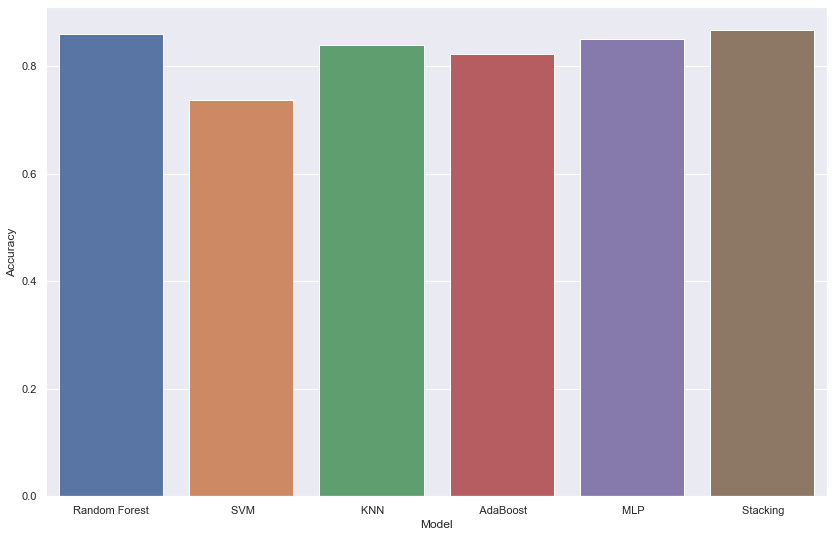

In [34]:
sns.barplot(data=df_accuracy,x='Model',y='Accuracy')

# Distrution of Accuracy Score per model, using 10 Folds

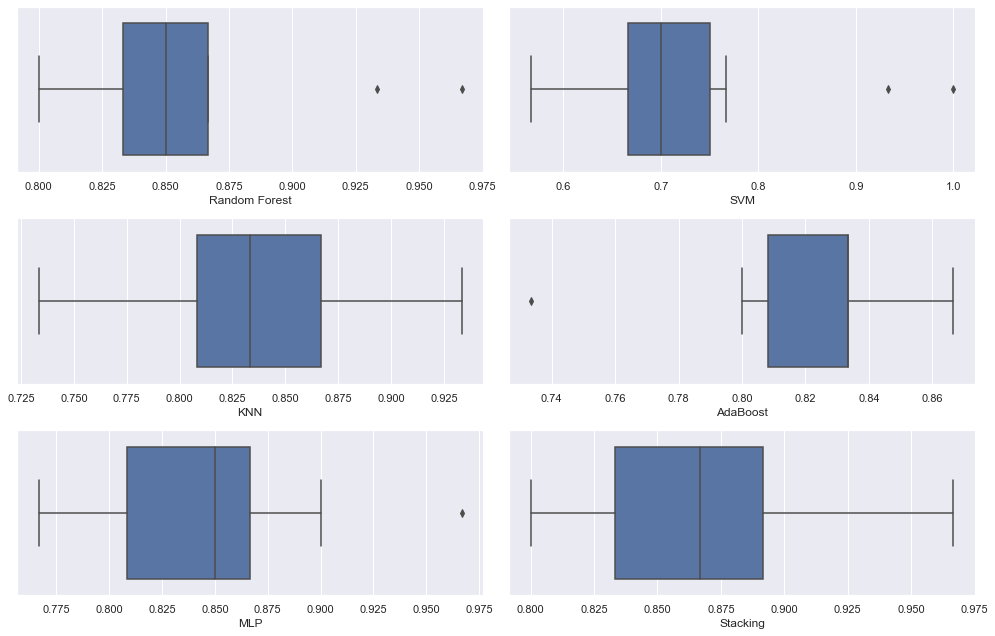

In [35]:
plt.subplot(3,2,1)
sns.boxplot(data=df_result,x='Random Forest')
plt.subplot(3,2,2)
sns.boxplot(data=df_result,x='SVM')
plt.subplot(3,2,3)
sns.boxplot(data=df_result,x='KNN')
plt.subplot(3,2,4)
sns.boxplot(data=df_result,x='AdaBoost')
plt.subplot(3,2,5)
sns.boxplot(data=df_result,x='MLP')
plt.subplot(3,2,6)
sns.boxplot(data=df_result,x='Stacking')

plt.tight_layout()

In [36]:
test_score = []
train_score = []
for train_set,test_set in skf.split(X,y):
    X_train, X_test = X.iloc[train_set], X.iloc[test_set]
    y_train, y_test = y[train_set], y[test_set]
    
    #random forest
    final_models[0].fit(X_train,y_train)
    
    rf_pred_train = final_models[0].predict(X_train)
    rf_pred_test = final_models[0].predict(X_test)
    
    train_score.append(mean_absolute_error(y_train,rf_pred_train))
    test_score.append(mean_absolute_error(y_test,rf_pred_test))
    
    #svm
    final_models[1].fit(X_train,y_train)
    
    svm_pred_train = final_models[1].predict(X_train)
    svm_pred_test = final_models[1].predict(X_test)
    
    train_score.append(mean_absolute_error(y_train,svm_pred_train))
    test_score.append(mean_absolute_error(y_test,svm_pred_test))
    
    #knn
    final_models[2].fit(X_train,y_train)
    
    knn_pred_train = final_models[2].predict(X_train)
    knn_pred_test = final_models[2].predict(X_test)
    
    train_score.append(mean_absolute_error(y_train,knn_pred_train))
    test_score.append(mean_absolute_error(y_test,knn_pred_test))
    
    #ada
    final_models[3].fit(X_train,y_train)
    
    ada_pred_train = final_models[3].predict(X_train)
    ada_pred_test = final_models[3].predict(X_test)
    
    train_score.append(mean_absolute_error(y_train,ada_pred_train))
    test_score.append(mean_absolute_error(y_test,ada_pred_test))
    
    #mlp
    final_models[4].fit(X_train,y_train)
    
    mlp_pred_train = final_models[4].predict(X_train)
    mlp_pred_test = final_models[4].predict(X_test)
    
    train_score.append(mean_absolute_error(y_train,mlp_pred_train))
    test_score.append(mean_absolute_error(y_test,mlp_pred_test))
    
    #stakcing
    final_models[5].fit(X_train,y_train)
    
    stacking_pred_train = final_models[4].predict(X_train)
    stacking_pred_test = final_models[4].predict(X_test)
    
    train_score.append(mean_absolute_error(y_train,stacking_pred_train))
    test_score.append(mean_absolute_error(y_test,stacking_pred_test))


In [37]:
test_score_arr = np.array(test_score)
train_score_arr = np.array(train_score)

In [38]:
test_score_arr  = test_score_arr.reshape(6,10)
train_score_arr  = train_score_arr.reshape(6,10)

# Visualizing model overfitting after using Oversampling -> Standard Scaler -> PCA

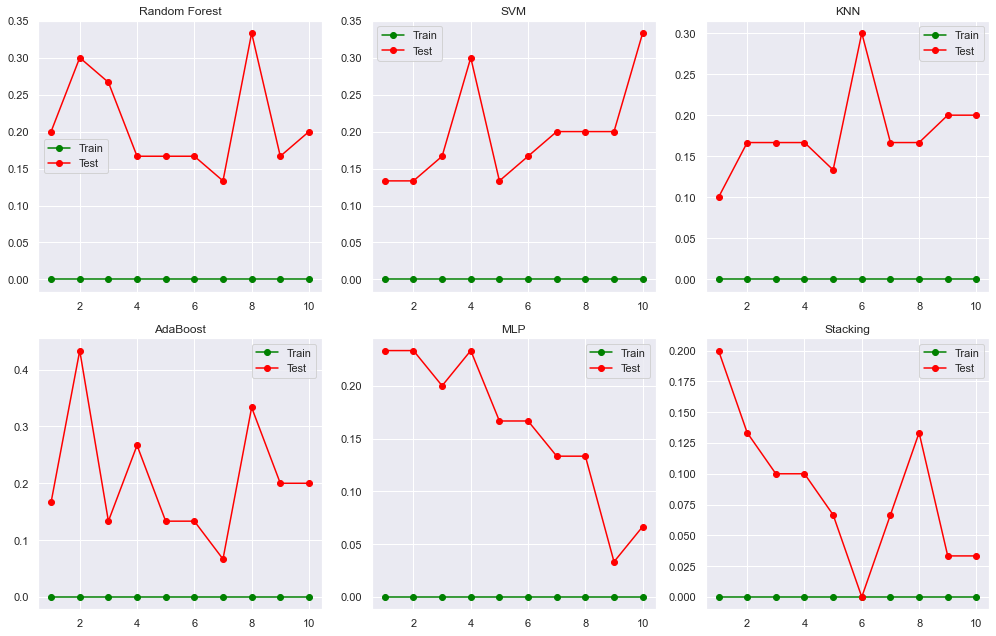

In [39]:
plt.subplot(2,3,1)
plt.plot(range(1,skf.get_n_splits()+1),train_score_arr[0],'o-',color='green',label='Train')
plt.plot(range(1,skf.get_n_splits()+1),test_score_arr[0],'o-',color='red',label='Test')
plt.title('Random Forest')
plt.legend()

plt.subplot(2,3,2)
plt.plot(range(1,skf.get_n_splits()+1),train_score_arr[1],'o-',color='green',label='Train')
plt.plot(range(1,skf.get_n_splits()+1),test_score_arr[1],'o-',color='red',label='Test')
plt.title('SVM')
plt.legend()

plt.subplot(2,3,3)
plt.plot(range(1,skf.get_n_splits()+1),train_score_arr[2],'o-',color='green',label='Train')
plt.plot(range(1,skf.get_n_splits()+1),test_score_arr[2],'o-',color='red',label='Test')
plt.title('KNN')
plt.legend()

plt.subplot(2,3,4)
plt.plot(range(1,skf.get_n_splits()+1),train_score_arr[3],'o-',color='green',label='Train')
plt.plot(range(1,skf.get_n_splits()+1),test_score_arr[3],'o-',color='red',label='Test')
plt.title('AdaBoost')
plt.legend()

plt.subplot(2,3,5)
plt.plot(range(1,skf.get_n_splits()+1),train_score_arr[4],'o-',color='green',label='Train')
plt.plot(range(1,skf.get_n_splits()+1),test_score_arr[4],'o-',color='red',label='Test')
plt.title('MLP')
plt.legend()

plt.subplot(2,3,6)
plt.plot(range(1,skf.get_n_splits()+1),train_score_arr[5],'o-',color='green',label='Train')
plt.plot(range(1,skf.get_n_splits()+1),test_score_arr[5],'o-',color='red',label='Test')
plt.title('Stacking')
plt.legend()

plt.tight_layout()

plt.show()

## Observation 1: after using the said technqiues our model's overfitting is reduced from 0.2 - 0.4 to 0.0 - 0.2

## Observation 2: upon using Stacking techniques, the accuracy slightly increase and the overfit of the model decrease